In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [7]:
data = pd.read_csv("dataset/heart_2022_with_nans.csv")

In [8]:
print("Initial data shape: ", data.shape)

Initial data shape:  (445132, 40)


In [9]:
# cont_cols = ['age','wage per hour','capital gains','capital losses','dividends from stocks','num persons worked for employer','weeks worked in year']
categorical_features = data.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_features

['State',
 'Sex',
 'GeneralHealth',
 'LastCheckupTime',
 'PhysicalActivities',
 'RemovedTeeth',
 'HadHeartAttack',
 'HadAngina',
 'HadStroke',
 'HadAsthma',
 'HadSkinCancer',
 'HadCOPD',
 'HadDepressiveDisorder',
 'HadKidneyDisease',
 'HadArthritis',
 'HadDiabetes',
 'DeafOrHardOfHearing',
 'BlindOrVisionDifficulty',
 'DifficultyConcentrating',
 'DifficultyWalking',
 'DifficultyDressingBathing',
 'DifficultyErrands',
 'SmokerStatus',
 'ECigaretteUsage',
 'ChestScan',
 'RaceEthnicityCategory',
 'AgeCategory',
 'AlcoholDrinkers',
 'HIVTesting',
 'FluVaxLast12',
 'PneumoVaxEver',
 'TetanusLast10Tdap',
 'HighRiskLastYear',
 'CovidPos']

In [10]:
data.drop_duplicates(inplace=True)
print("Data shape after removing duplicates: ", data.shape) 

Data shape after removing duplicates:  (444975, 40)


### Count Plot

In [11]:
def count_plots(data,categorical_features):
    n_cat = len(categorical_features)

    fig, axes = plt.subplots(n_cat, 1, figsize=(12, 5*n_cat))

    for i, feature in enumerate(categorical_features):
        sns.countplot(data=data, x=feature, ax=axes[i] if n_cat > 1 else axes)
        axes[i].set_title(f"Count Plot of {feature}")
        axes[i].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

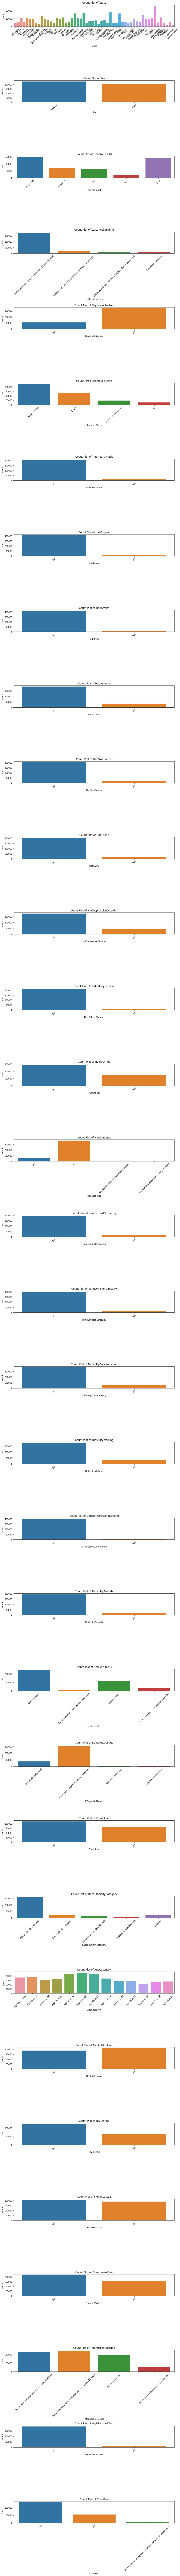

In [12]:
count_plots(data,categorical_features)

In [26]:
#  Dropping all duplicates and nan values
data.drop_duplicates(inplace=True)
data.dropna(inplace=True)


In [44]:
def categorical_plots(data,categorical_list,type):
    features = [col for col in categorical_list if col !='GeneralHealth']
    n_features = len(features)
    n_cols = 4
    n_rows = (n_features +  n_cols -1)//n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(56,10*n_rows))
    axes = axes.flatten()

    if type=="pie":
        for i, feature in enumerate(features):
            data[feature].value_counts().plot.pie(autopct="%.1f%%", ax=axes[i])
            axes[i].set_title(f"Pie Plot of {feature}")
            axes[i].set_ylabel('')
            axes[i].set_xlabel('')

    elif type=="count":
        for i, feature in enumerate(features):
            sns.countplot(data=data, x=feature, ax=axes[i])
            axes[i].set_title(f"Count Plot of {feature}")
            axes[i].tick_params(axis='x', rotation=90)



    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()
    



### Pie Plots ###

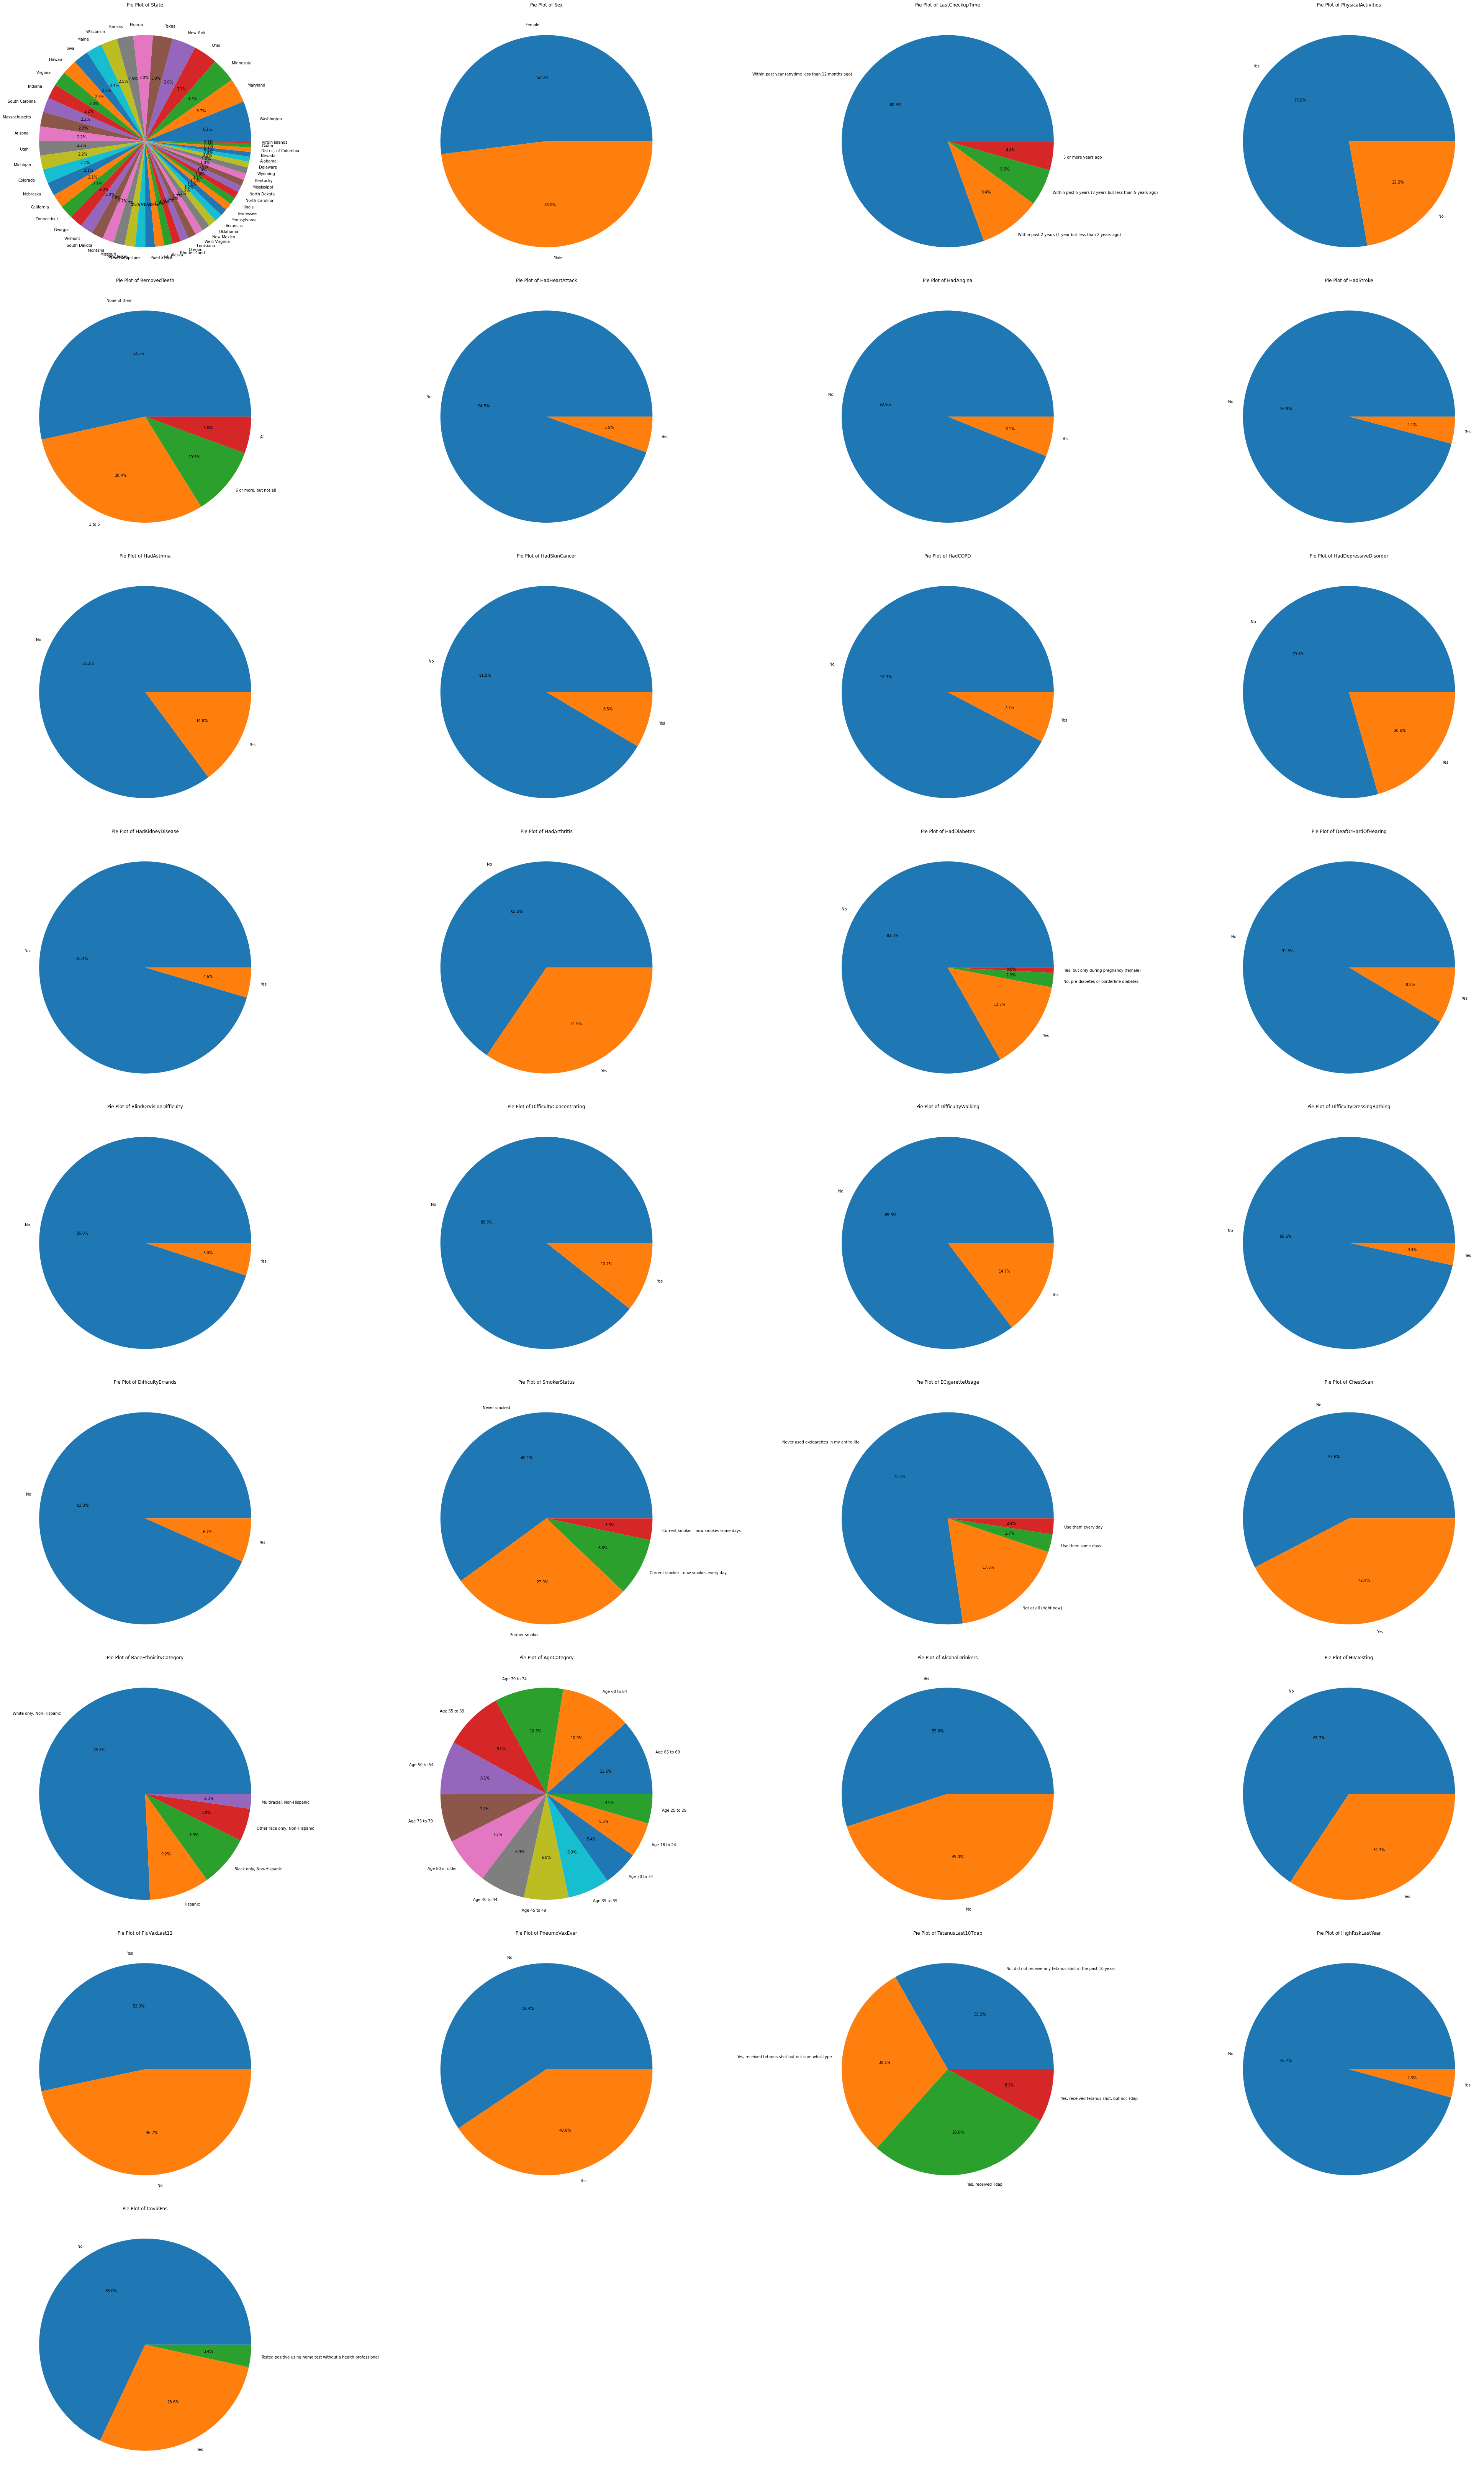

In [46]:
categorical_plots(data,categorical_features,"pie")

### Count Plot ###

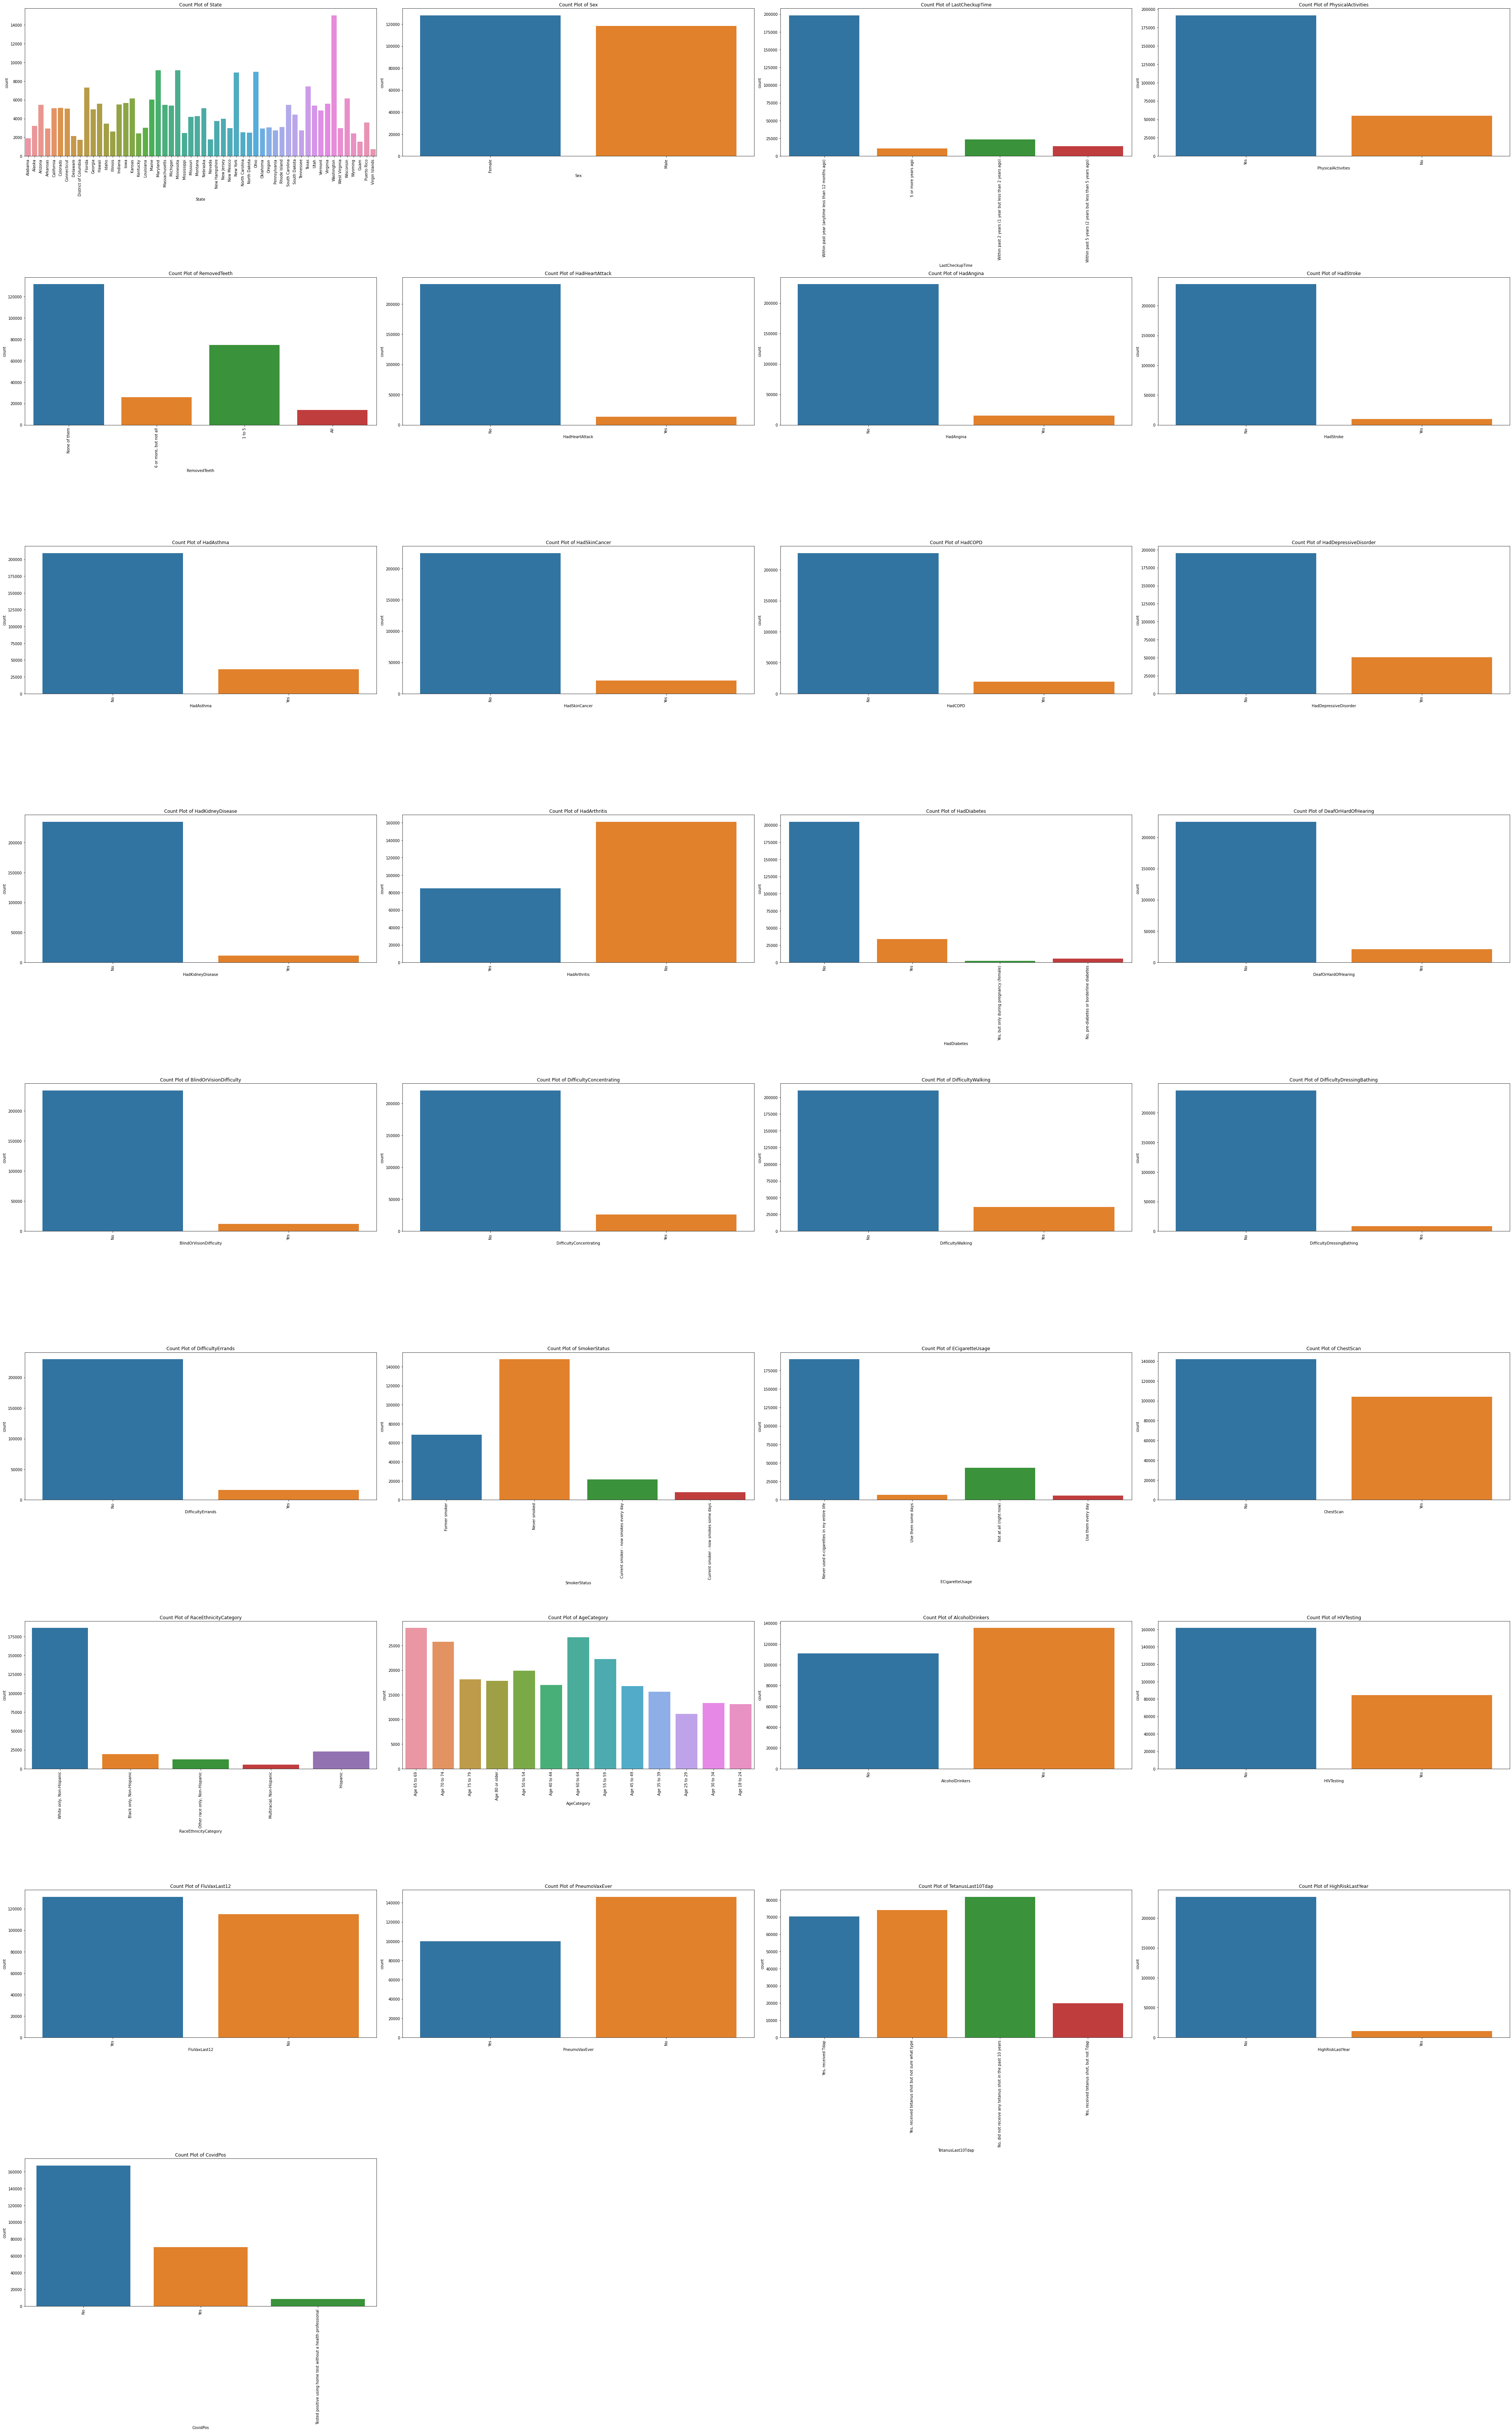

In [45]:
categorical_plots(data,categorical_features,"count")